In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Model,load_model
from keras.layers import Input,Dense
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers

RANDOM_SEED=42
TEST_PCT=0.3
LABELS=['Normal','Fraud']


In [2]:
df=pd.read_csv(r'creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().values.any()

False

In [6]:
df.shape

(284807, 31)

## Visualize Transactions

C:\Users\rajmp\AppData\Local\Temp\ipykernel_3224\46723014.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes=pd.value_counts(df['Class'],sort=True)


([<matplotlib.axis.XTick at 0x22178a73a90>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

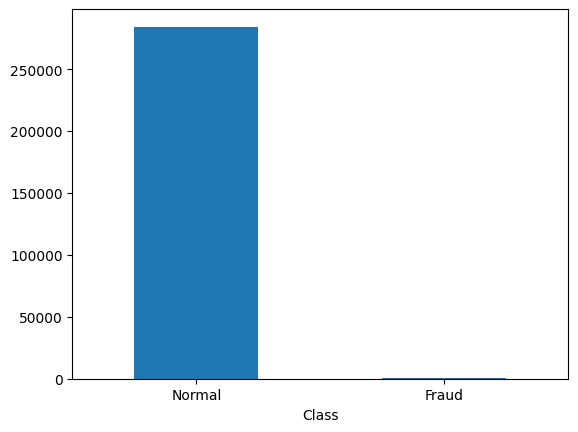

In [7]:
LABELS=["Normal","Fraud"]
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(2), LABELS)

### Save new data

In [8]:
frauds=df[df.Class==1]
Normal=df[df.Class==0]

In [9]:
frauds.shape

(492, 31)

In [10]:
Normal.shape

(284315, 31)

In [11]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
frauds.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

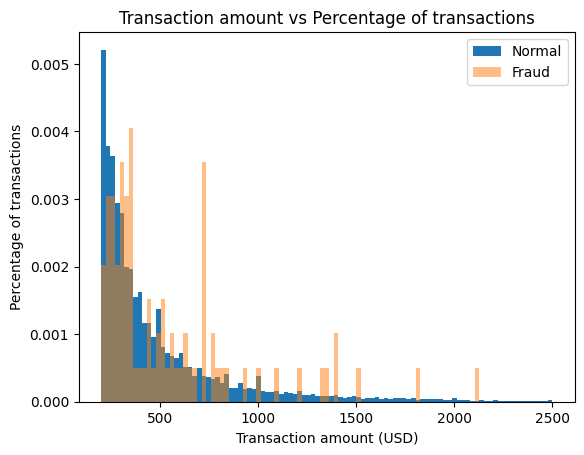

In [14]:
bins = np.linspace(200, 2500, 100)
plt.hist(Normal.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(frauds.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

Text(0.5, 1.0, 'Normal')

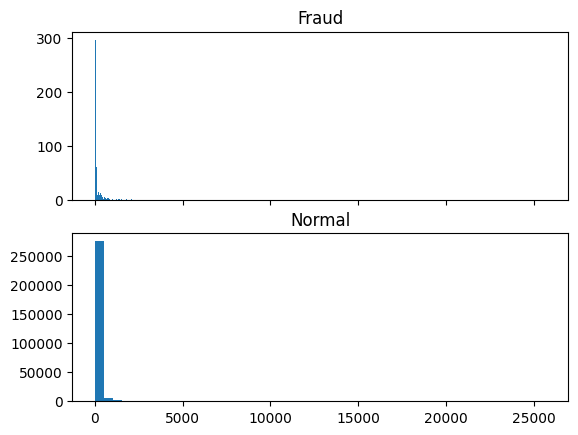

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')


Text(0.5, 1.0, 'Normal')

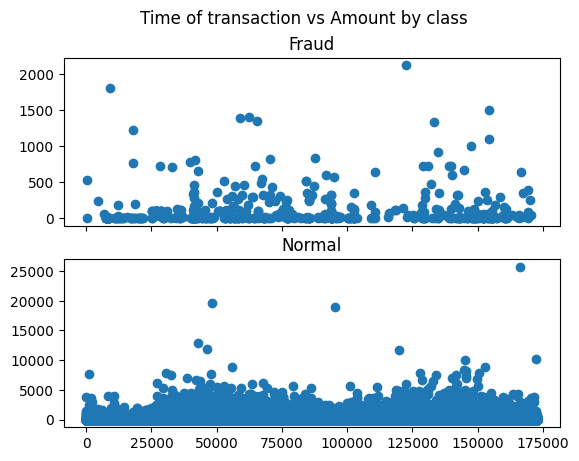

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

### Preparing Data

In [17]:
from sklearn.preprocessing import StandardScaler
data=df.drop(['Time'],axis=1)
data['Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))



In [18]:

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape


(227451, 29)

### Build the Model

In [19]:
input_dim=X_train.shape[1]
encoding_dim=14
input_layer=Input(shape=(input_dim, ))
encoder=Dense(encoding_dim,activation='tanh',activity_regularizer=regularizers.L1(1e-7))(input_layer)
encoder=Dense(int(encoding_dim/2),activation='relu')(encoder)
decoder=Dense(int(encoding_dim/2),activation="tanh")(encoder)
decoder=Dense(input_dim,activation="relu")(decoder)
autoencoder=Model(inputs=input_layer,outputs=decoder)

### compile the model

In [20]:
np_epochs=50
batch_size=64
autoencoder.compile(metrics=["accuracy"],
                   loss="mean_squared_error",
                   optimizer="adam")

### Create checkpoint,early stopping 

In [21]:
checkpointer=ModelCheckpoint(filepath='model.h5',monitor='val_loss' ,verbose=2,mode="min",save_best_only=True)
from keras.callbacks import EarlyStopping
ear_stop=EarlyStopping(mode='min',monitor='val_loss',verbose=1,patience=10,restore_best_weights=True)

### Fit the model

In [22]:
history = autoencoder.fit(X_train, X_train,
                    epochs=np_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, ear_stop]).history

Epoch 1/50
3514/3554 [============================>.] - ETA: 0s - loss: 0.8311 - accuracy: 0.5553
Epoch 1: val_loss improved from inf to 0.79506, saving model to model.h5
3554/3554 [==============================] - 17s 4ms/step - loss: 0.8296 - accuracy: 0.5562 - val_loss: 0.7951 - val_accuracy: 0.6440
Epoch 2/50
 128/3554 [>.............................] - ETA: 4s - loss: 0.7196 - accuracy: 0.6399

C:\Users\rajmp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3529/3554 [============================>.] - ETA: 0s - loss: 0.7482 - accuracy: 0.6524
Epoch 2: val_loss improved from 0.79506 to 0.77414, saving model to model.h5
3554/3554 [==============================] - 6s 2ms/step - loss: 0.7503 - accuracy: 0.6526 - val_loss: 0.7741 - val_accuracy: 0.6628
Epoch 3/50
3552/3554 [============================>.] - ETA: 0s - loss: 0.7348 - accuracy: 0.6715
Epoch 3: val_loss improved from 0.77414 to 0.76427, saving model to model.h5
3554/3554 [==============================] - 6s 2ms/step - loss: 0.7347 - accuracy: 0.6715 - val_loss: 0.7643 - val_accuracy: 0.6824
Epoch 4/50
3534/3554 [============================>.] - ETA: 0s - loss: 0.7257 - accuracy: 0.6852
Epoch 4: val_loss improved from 0.76427 to 0.75817, saving model to model.h5
3554/3554 [==============================] - 6s 2ms/step - loss: 0.7260 - accuracy: 0.6853 - val_loss: 0.7582 - val_accuracy: 0.6980
Epoch 5/50
3536/3554 [============================>.] - ETA: 0s - loss: 0.7187 - accura

In [23]:
autoencoder=load_model('model.h5')

In [24]:
#Evalution

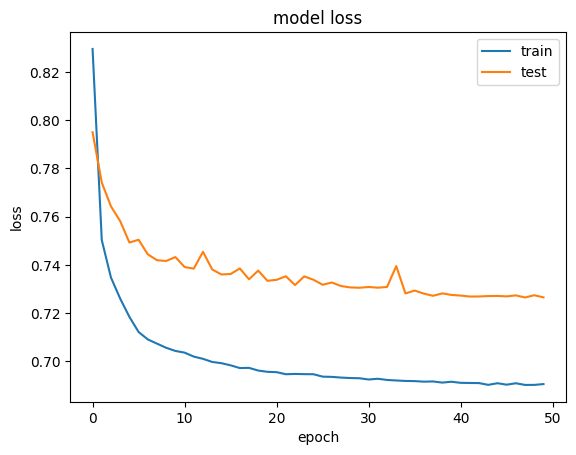

In [25]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Prediction

In [26]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 1s 690us/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.726482,0.001720
std,3.436129,0.041443
min,0.034863,0.000000
25%,0.239156,0.000000
50%,0.379264,0.000000
75%,0.605404,0.000000
max,255.917455,1.000000


### reconstruction error with fraud

<Axes: ylabel='Count'>

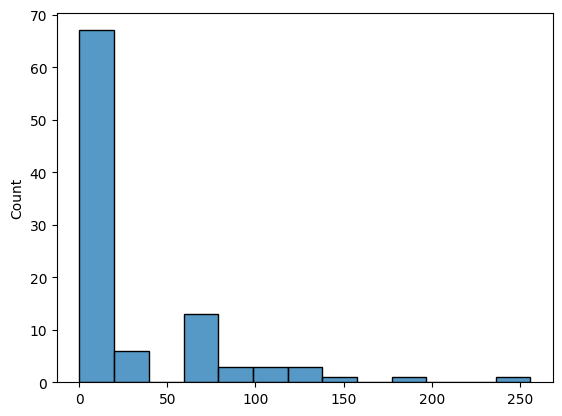

In [27]:
sns.histplot(error_df[error_df['true_class'] == 1].reconstruction_error.values)

In [28]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

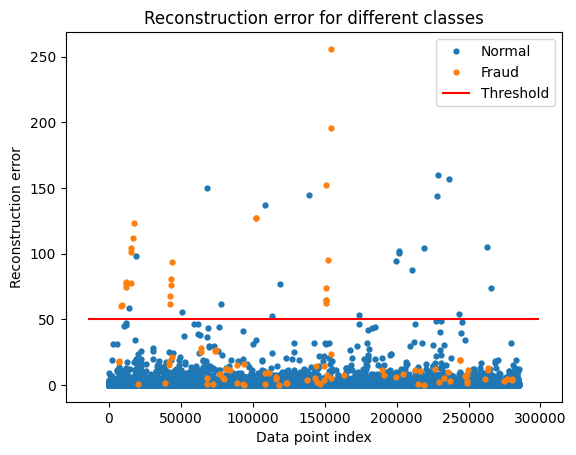

In [29]:
threshold=50
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

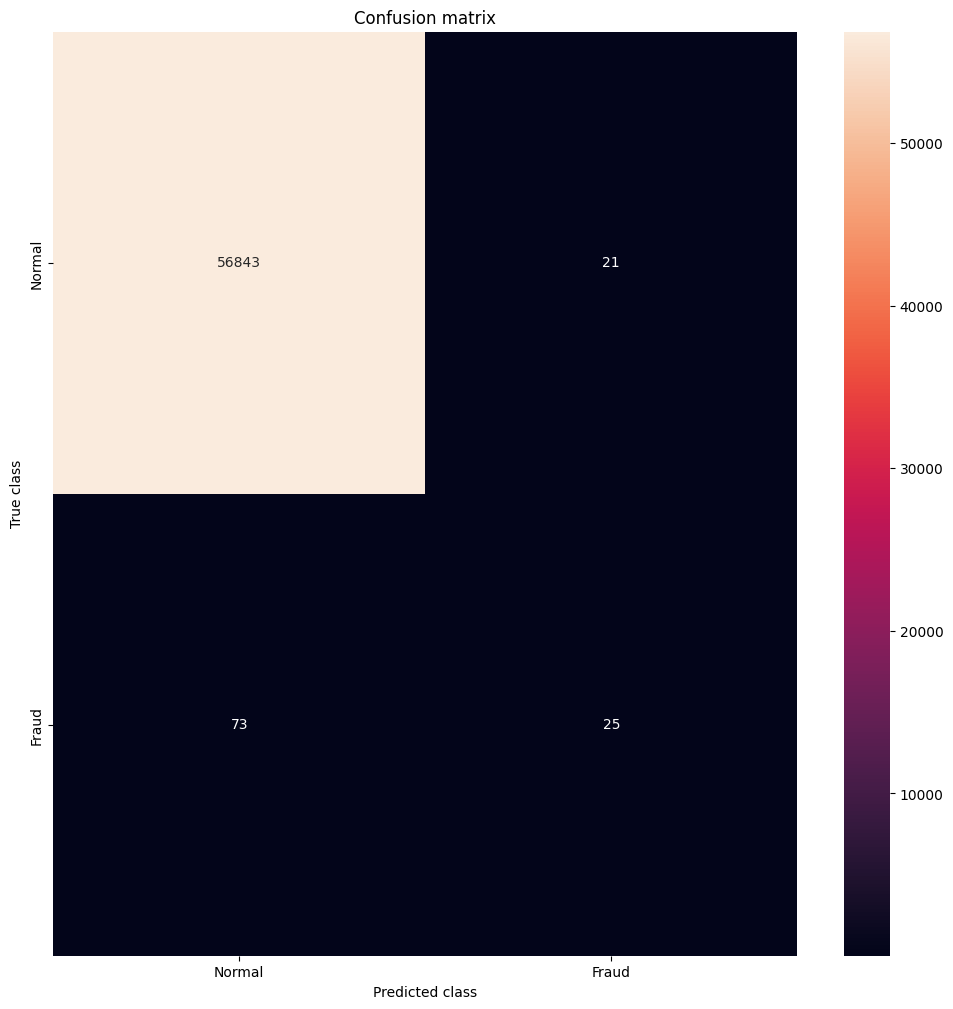

In [30]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()